# 🐷 Susie Package Test Notebook

### 🔷 Import the necessary python libraries and Susie objects.

Importing the package from Test PyPi

In [1]:
%pip install susie==1.0.8

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from susie.transit_times import TransitTimes
from susie.ephemeris import Ephemeris
import matplotlib.pyplot as plt
from astropy import coordinates as coords
from astropy import units as u
from astropy import time

### 🔷 **STEP 1:** Add your transit data to the TransitTimes object.

❗️**IMPORTANT:** Use either code block below depending on your data needs. The first code block contains values pulled from a CSV file. The second has hard coded values.

<small>NOTE: You can use any method and/or file type to upload your data. Just make sure the resulting variables (epoch, mid transit times, and mid transit time errors) are numpy arrays</small>

Can use this code block if you have the **CSV file**

In [3]:
# STEP 1: Upload data
filepath = "./WASP12b_transit_ephemeris.csv" # IMPORTANT: Change to your own filepath
# filepath = "ENTER YOUR FILEPATH HERE"
data = np.genfromtxt(filepath, delimiter=',', names=True)
# STEP 2: Break data up into epochs, mid transit times, and error
epochs = data["epoch"]
mid_transit_times = data["transit_time"]
mid_transit_times_err = data["sigma_transit_time"]
# STEP 2.5 (Optional): Make sure the epochs are integers and not floats
epochs = epochs.astype('int')

FileNotFoundError: ./WASP12b_transit_ephemeris.csv not found.

Can use this code block if you do not have CSV file, this is **hard coded**

In [6]:
# Hard Coded Data
# STEP 1: Upload data from file
epoch_data = [-1640.0, -1346.0, -1342.0, -1067.0, -1061.0, -1046.0, -1038.0, -1004.0, -1003.0, -985.0, -963.0, -743.0, -739.0, -729.0, -728.0, -721.0, -699.0, -699.0, -677.0, -655.0, -648.0, -646.0, -645.0, -643.0, -625.0, -393.0, -383.0, -382.0, -380.0, -368.0, -353.0, -350.0, -329.0, -328.0, -327.0, -324.0, -323.0, -317.0, -316.0, -307.0, -306.0, -296.0, -295.0, -294.0, -293.0, -283.0, -275.0, -274.0, -55.0, -51.0, -29.0, -21.0, -19.0, -7.0, -3.0, 0.0, 13.0, 21.0, 22.0, 274.0, 275.0, 276.0, 277.0, 297.0, 298.0, 320.0, 324.0, 327.0, 328.0, 329.0, 338.0, 341.0, 351.0, 356.0, 365.0, 372.0, 379.0, 381.0, 382.0, 624.0, 646.0, 648.0, 678.0, 679.0, 691.0, 692.0, 698.0, 699.0, 731.0, 953.0, 994.0, 995.0, 1027.0, 1028.0, 1050.0, 1252.0, 1270.0, 1281.0, 1284.0, 1302.0, 1303.0, 1338.0, 1339.0, 1344.0, 1345.0, 1348.0, 1352.0, 1352.0, 1357.0, 1359.0, 1370.0, 1377.0, 1378.0, 1379.0, 1577.0, 1599.0, 1608.0, 1620.0, 1621.0, 1624.0, 1666.0, 1667.0, 1674.0, 1676.0, 1678.0, 1695.0, 1695.0, 1696.0, 1699.0, 1701.0, 1701.0, 1702.0, 1702.0, 1705.0, 1716.0, 1930.0, 1985.0, 2006.0, 2017.0]
mid_transit_time_data = [2454515.525, 2454836.403, 2454840.769, 2455140.91, 2455147.459, 2455163.831, 2455172.561, 2455209.669, 2455210.762, 2455230.407, 2455254.419, 2455494.53, 2455498.896, 2455509.81, 2455510.902, 2455518.541, 2455542.552, 2455542.553, 2455566.564, 2455590.576, 2455598.216, 2455600.398, 2455601.49, 2455603.673, 2455623.318, 2455876.528, 2455887.442, 2455888.533, 2455890.716, 2455903.814, 2455920.184, 2455923.459, 2455946.378, 2455947.47, 2455948.561, 2455951.835, 2455952.927, 2455959.475, 2455960.567, 2455970.389, 2455971.481, 2455982.395, 2455983.487, 2455984.578, 2455985.67, 2455996.584, 2456005.315, 2456006.406, 2456245.427, 2456249.794, 2456273.805, 2456282.536, 2456284.719, 2456297.816, 2456302.182, 2456305.455, 2456319.644, 2456328.376, 2456329.467, 2456604.505, 2456605.596, 2456606.688, 2456607.779, 2456629.607, 2456630.699, 2456654.71, 2456659.076, 2456662.35, 2456663.441, 2456664.533, 2456674.356, 2456677.63, 2456688.544, 2456694.002, 2456703.824, 2456711.464, 2456719.104, 2456721.287, 2456722.378, 2456986.502, 2457010.513, 2457012.696, 2457045.438, 2457046.53, 2457059.627, 2457060.718, 2457067.267, 2457068.358, 2457103.284, 2457345.579, 2457390.327, 2457391.418, 2457426.343, 2457427.435, 2457451.446, 2457671.913, 2457691.559, 2457703.564, 2457706.838, 2457726.484, 2457727.575, 2457765.775, 2457766.866, 2457772.324, 2457773.415, 2457776.689, 2457781.054, 2457781.056, 2457786.512, 2457788.695, 2457800.7, 2457808.34, 2457809.432, 2457810.523, 2458026.624, 2458050.635, 2458060.459, 2458073.555, 2458074.647, 2458077.921, 2458123.76, 2458124.852, 2458132.491, 2458134.675, 2458136.858, 2458155.41, 2458155.412, 2458156.503, 2458159.778, 2458161.96, 2458161.96, 2458163.051, 2458163.051, 2458166.326, 2458178.331, 2458411.895, 2458471.923, 2458494.843, 2458506.848]
mid_transit_times_uncertainties_data = [0.00043, 0.00028, 0.00062, 0.00042, 0.00043, 0.00032, 0.00036, 0.00046, 0.00041, 0.00019, 0.00043, 0.00072, 0.00079, 0.00037, 0.00031, 0.0004, 0.0004, 0.00028, 0.00028, 0.00068, 0.00035, 0.00029, 0.00024, 0.00029, 0.00039, 0.00027, 0.00021, 0.00027, 0.00024, 0.00032, 0.00031, 0.00022, 0.00018, 0.00017, 0.00033, 0.00011, 0.0001, 0.00017, 0.00032, 0.00039, 0.00035, 0.00034, 0.00035, 0.00032, 0.00042, 0.00037, 0.00037, 0.00031, 0.00033, 0.00039, 0.0003, 0.0003, 0.0003, 0.0003, 0.00046, 0.00024, 0.00038, 0.00027, 0.00029, 0.00021, 0.0003, 0.00033, 0.00071, 0.00019, 0.00043, 0.00034, 0.00034, 0.00019, 0.00019, 0.00031, 0.00028, 0.00032, 0.0004, 0.00029, 0.00029, 0.00025, 0.00034, 0.00034, 0.00046, 0.00043, 0.00039, 0.00049, 0.00046, 0.00049, 0.00035, 0.00036, 0.00022, 0.0002, 0.00031, 0.00042, 0.00033, 0.00033, 0.00055, 0.00023, 0.00021, 0.00035, 0.00025, 0.00034, 0.00037, 0.00028, 0.00023, 0.00028, 0.00039, 0.00024, 0.00022, 0.00029, 0.00043, 0.00036, 0.00026, 0.00048, 0.00032, 0.0004, 0.00018, 0.00021, 0.00056, 0.00023, 0.0003, 0.00022, 0.00034, 0.00028, 0.00027, 0.00035, 0.00031, 0.00032, 0.00033, 0.0005, 0.00031, 0.00032, 0.00091, 0.00035, 0.00026, 0.00021, 0.00034, 0.00034, 0.00038, 0.0004, 0.00026, 0.0003, 0.00044]
# STEP 2: Break data up into epochs, mid transit times, and error
epochs = epoch_data - np.min(epoch_data)
mid_transit_times = mid_transit_time_data - np.min(mid_transit_time_data)
mid_transit_times_err = mid_transit_times_uncertainties_data
# STEP 2.5 (Optional): Make sure the epochs are integers and not floats
epochs = epochs.astype('int')

❗️ **IMPORTANT**: Our timing data is going to be in JD TDB timing system and scale (AKA Barycentric Julian Date). 

We **can** input data with a different timing scale and system, and the TransitTimes object will automatically correct it to JD TDB. HOWEVER, we will have to put in the coordinates of the object (RA and Dec in degrees) and the observatory the observations were taken from (in lon and lat in degrees). You have the option to omit observatory coordinates if you do not know them, the function will use the gravitational center of the Earth (x, y, x=0, 0, 0).

Example with JD TDB timing system and scale.

In [7]:
# STEP 3: Create new transit times object with above data
transit_times_obj1 = TransitTimes('jd', epochs, mid_transit_times, mid_transit_times_err, time_scale='tdb')
# STEP 4 (Optional): To check that the resulting data is correct, you can print each variable and the corresponding data using this command:
# print(vars(transit_times_obj1))

TypeError: The variable 'mid_transit_times_uncertainties' expected a NumPy array (np.ndarray) but received a different data type

Example with JD UTC timing system and scale. (NOTE: Don't be scared of the warnings, nothing is wrong.)

<small>Using RA and Dec of WASP 12-b and lon, lat of Boise State for observatory.</small>

In [8]:
# STEP 3: Create new transit times object with above data
transit_times_obj1 = TransitTimes('jd', epochs, mid_transit_times, mid_transit_times_err, object_ra=97.64, object_dec=29.67, observatory_lat=43.60, observatory_lon=-116.21)

/Users/brian/opt/anaconda3/envs/Experimenting_with_Susie/lib/python3.12/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 139 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/brian/opt/anaconda3/envs/Experimenting_with_Susie/lib/python3.12/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utcut1" yielded 139 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/brian/opt/anaconda3/envs/Experimenting_with_Susie/lib/python3.12/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 139 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/brian/opt/anaconda3/envs/Experimenting_with_Susie/lib/python3.12/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "epv00" yielded 139 of "warning: date outsidethe range 1900-2100 AD"
  warnings.warn('ERFA function "{}" yielded 

### 🔷 **STEP 2:** Create the Ephemeris object and add your TransitTimes object.

In [9]:
ephemeris_obj1 = Ephemeris(transit_times_obj1)

### 🔷 **STEP 3:** Fit your transit time data to an ephemeris model. You can specify what type of model with the options 'linear' or 'quadratic'.

In [10]:
# Getting a linear model will solve for period and conjuction time (and their respective errors)
linear_model_data = ephemeris_obj1.get_model_ephemeris('linear')

Calling `get_model_ephemeris` will return a dictionary of data. You can view the data returned from this if you run `print(linear_model_data)`. Now you can use the linear_model_data dictionary for plotting method, such as the ones below. You can use the same process for a quadratic model ephemeris (shown below).

In [11]:
linear_model_data

{'period': 1.0914196063294288,
 'period_err': 3.184013736102108e-07,
 'conjunction_time': 0.003667836482391995,
 'conjunction_time_err': 0.0007169734137829879,
 'model_type': 'linear',
 'model_data': array([3.66783648e-03, 3.20881032e+02, 3.25246711e+02, 6.25387102e+02,
        6.31935620e+02, 6.48306914e+02, 6.57038271e+02, 6.94146537e+02,
        6.95237957e+02, 7.14883510e+02, 7.38894741e+02, 9.79007055e+02,
        9.83372733e+02, 9.94286929e+02, 9.95378349e+02, 1.00301829e+03,
        1.02702952e+03, 1.02702952e+03, 1.05104075e+03, 1.07505198e+03,
        1.08269192e+03, 1.08487476e+03, 1.08596618e+03, 1.08814902e+03,
        1.10779457e+03, 1.36100392e+03, 1.37191811e+03, 1.37300953e+03,
        1.37519237e+03, 1.38828941e+03, 1.40466070e+03, 1.40793496e+03,
        1.43085477e+03, 1.43194619e+03, 1.43303761e+03, 1.43631187e+03,
        1.43740329e+03, 1.44395181e+03, 1.44504323e+03, 1.45486600e+03,
        1.45595742e+03, 1.46687162e+03, 1.46796304e+03, 1.46905446e+03,
        1

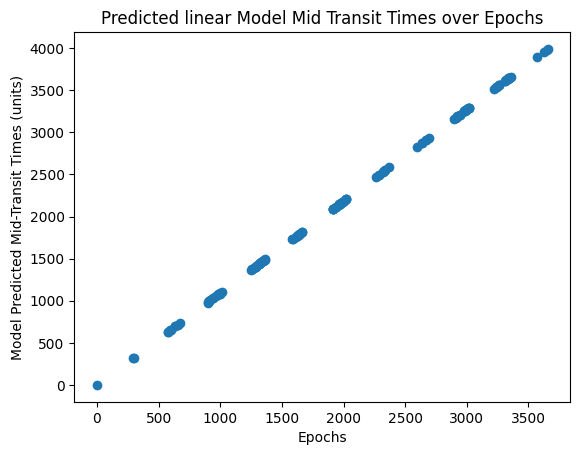

In [12]:
# Now we can plot this model
ephemeris_obj1.plot_model_ephemeris(linear_model_data, save_plot=False)

In [13]:
# Getting a quadratic model will solve for period, conjuction time, and period change per epoch (and their respective errors)
quadratic_model_data = ephemeris_obj1.get_model_ephemeris('quadratic')

In [14]:
quadratic_model_data

{'conjunction_time': 0.002230666920696489,
 'conjunction_time_err': 0.0014708190753312594,
 'period': 1.0914213505556094,
 'period_err': 1.5936474555366707e-06,
 'period_change_by_epoch': -8.453411542926757e-10,
 'period_change_by_epoch_err': 7.576823327197525e-10,
 'model_type': 'quadratic',
 'model_data': array([2.23066692e-03, 3.20880071e+02, 3.25245756e+02, 6.25386526e+02,
        6.31935051e+02, 6.48306364e+02, 6.57037731e+02, 6.94146039e+02,
        6.95237459e+02, 7.14883034e+02, 7.38894291e+02, 9.79006842e+02,
        9.83372524e+02, 9.94286730e+02, 9.95378151e+02, 1.00301809e+03,
        1.02702935e+03, 1.02702935e+03, 1.05104060e+03, 1.07505185e+03,
        1.08269179e+03, 1.08487464e+03, 1.08596606e+03, 1.08814890e+03,
        1.10779447e+03, 1.36100400e+03, 1.37191820e+03, 1.37300962e+03,
        1.37519246e+03, 1.38828950e+03, 1.40466081e+03, 1.40793507e+03,
        1.43085489e+03, 1.43194632e+03, 1.43303774e+03, 1.43631200e+03,
        1.43740342e+03, 1.44395194e+03, 1.44

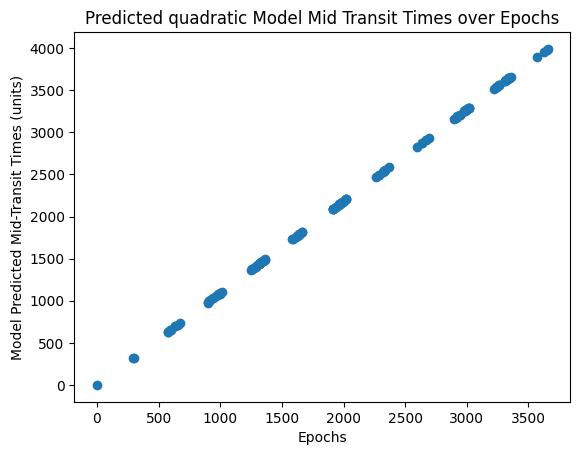

In [15]:
ephemeris_obj1.plot_model_ephemeris(quadratic_model_data, save_plot=False)

We can also plot the model uncertainties with the `plot_timing_uncertainties` method.

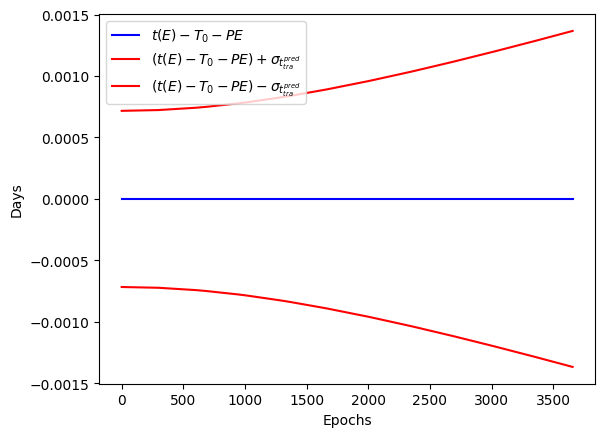

In [16]:
ephemeris_obj1.plot_timing_uncertainties(linear_model_data, save_plot=False)

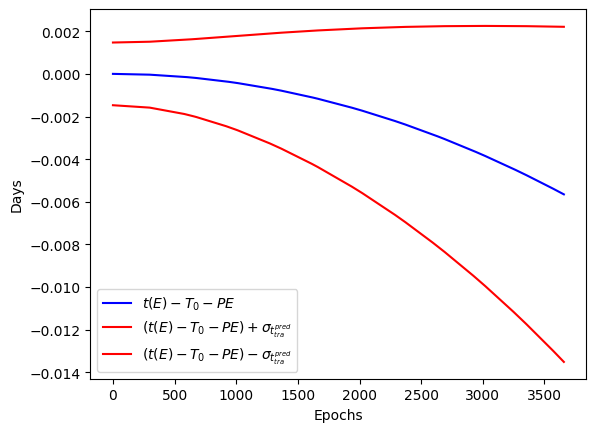

In [17]:
ephemeris_obj1.plot_timing_uncertainties(quadratic_model_data, save_plot=False)

We can get the BIC value for a specific model fit using the model data dictionaries returned from the `get_model_ephemeris` method.

In [18]:
linear_bic_value = ephemeris_obj1.calc_bic(linear_model_data)
quadratic_bic_value = ephemeris_obj1.calc_bic(quadratic_model_data)

print(f"Linear Model BIC: {linear_bic_value}\nQuadratic Model BIC: {quadratic_bic_value}")

Linear Model BIC: 34.57672850586392
Quadratic Model BIC: 38.25341616289514


And we can also get a delta BIC value. We do not need to input any data for this method. It will create the linear and quadratic models for you and calculate the BIC and delta BIC values. However, it **ONLY returns the delta BIC value** and not the other data calculated.

In [19]:
delta_bic_value = ephemeris_obj1.calc_delta_bic()

print(f"Delta BIC: {delta_bic_value}")

Delta BIC: -3.6766876570312235


The last two methods accessible to the user are an OC plotting method and a running delta BIC plotting method.

The OC plot for now just plots the observed minus calculated points (calculated with $x=E$, $y=T_0-PE$, $yerr=\sigma T_0$) and a curve with the quadratic term ($x=E$, $y=0.5 \frac{dP}{dE} (E - median E)^2$).

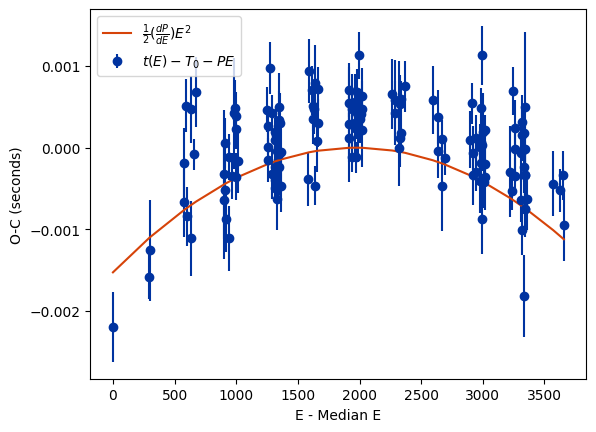

In [16]:
ephemeris_obj1.plot_oc_plot()

This is the `plot_running_delta_bic` method. This is a work in progress, but the basic data is in there.

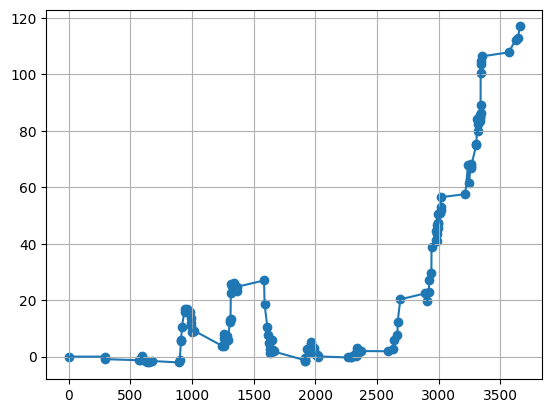

In [17]:
ephemeris_obj1.plot_running_delta_bic()